# Problem Statement

Write a Jupyter Notebook to fetch US Stock Market data from any Open Source Finance API. Example: Yahoo Finance, Quandl or Finnhub.


One task is to get the 1-year data for any one of the stocks (Eg: Tesla). Plot the data of the stock closing price using matplotlib highlighting the 52 week high and 52 week low. 

Now try to group the days when the integer price for the stock was the same. 

For eg: if the closing price for the week is: 300.50, 300.90, 302.20, 303.50, 303.80 then the group will be (300: 2, 302:1 , 303:2) and plot a bar graph for the same. (x- price, y - number of occurrences)


*Please submit a well-documented jupyter notebook containing all your analysis, solution and alternate approaches, its advantages and disadvantages/limitations.*

# Task 1

In [1]:
# import finance API
import yfinance as yf

In [2]:
# import data analysis libraries
import numpy as np
import pandas as pd

In [3]:
# import visual library
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# define the stock ticker symbol
ticker_stock = 'TSLA'

In [5]:
# put data into ticker data variable
ticker_data = yf.Ticker(ticker_stock)

In [6]:
# get 1-year of data for stock ticker symbol
ticker_df = ticker_data.history(period='1d', start='2019-10-29', end='2020-10-29')

In [7]:
# view dataset info
ticker_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-10-29 to 2020-10-28
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Volume        253 non-null    int64  
 5   Dividends     253 non-null    int64  
 6   Stock Splits  253 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 15.8 KB


In [8]:
# basic dataset statistics
ticker_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.0,253.000000
mean,206.589692,212.571463,200.417320,206.849312,6.897793e+07,0.0,0.019763
std,128.120956,131.695543,123.875002,128.106960,4.047695e+07,0.0,0.314347
min,62.599998,63.296001,61.852001,62.661999,1.232800e+07,0.0,0.000000
25%,101.000000,103.330002,98.433998,102.697998,3.973700e+07,0.0,0.000000
50%,161.000000,164.800003,157.000000,160.102005,6.331450e+07,0.0,0.000000
75%,300.799988,309.783997,294.200012,300.167999,8.817450e+07,0.0,0.000000
max,502.140015,502.489990,470.510010,498.320007,3.046940e+08,0.0,5.000000


In [9]:
# sample the data frame
ticker_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-29,63.998001,64.860001,62.950001,63.243999,63421500,0,0.0
2019-10-30,62.599998,63.757999,61.993999,63.001999,48209000,0,0.0
2019-10-31,62.619999,63.799999,62.599998,62.984001,25335000,0,0.0
2019-11-01,63.264000,63.296001,61.959999,62.661999,31919500,0,0.0
2019-11-04,62.959999,64.388000,61.852001,63.493999,43935000,0,0.0


In [10]:
# change Date from index to column
df = ticker_df.reset_index(inplace = True)

In [11]:
# sample the new data frame
ticker_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-10-29,63.998001,64.860001,62.950001,63.243999,63421500,0,0.0
1,2019-10-30,62.599998,63.757999,61.993999,63.001999,48209000,0,0.0
2,2019-10-31,62.619999,63.799999,62.599998,62.984001,25335000,0,0.0
3,2019-11-01,63.264000,63.296001,61.959999,62.661999,31919500,0,0.0
4,2019-11-04,62.959999,64.388000,61.852001,63.493999,43935000,0,0.0


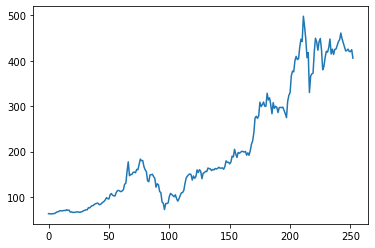

In [12]:
# initial plot of Date vs. Close
ticker_df['Close'].plot()

In [13]:
# minimum stock price in last 52 weeks
min_price = ticker_df['Close'].min()
print(min_price)

62.6619987487793


In [14]:
# date of minimum stock price in last 52 weeks
date_of_min = ticker_df[ticker_df['Close'] == min_price]['Date'].values[0]
print(date_of_min)

# convert to date to string
min_date = pd.to_datetime(date_of_min)
min_date = str(min_date.date())

2019-11-01T00:00:00.000000000


In [15]:
# max stock price in last 52 weeks
max_price = max(ticker_df['Close'])
print(max_price)

498.32000732421875


In [16]:
# date of max stock price in last 52 weeks
date_of_max = ticker_df[ticker_df['Close'] == max_price]['Date'].values[0]
print(date_of_max)

# convert to date to string
max_date = pd.to_datetime(date_of_max)
max_date = str(max_date.date())

2020-08-31T00:00:00.000000000


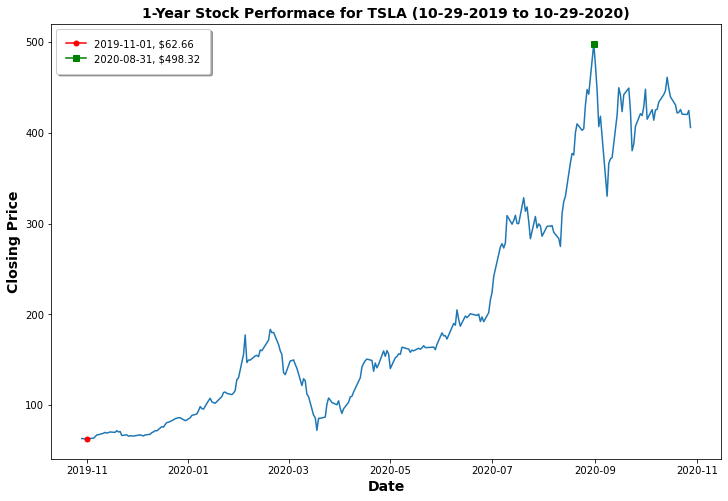

In [17]:
# adding labels, adjust plot size, highlight 52-week min/max
fig = plt.figure(figsize=(12,8))
plt.plot(ticker_df['Date'], ticker_df['Close'])
plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Closing Price', fontsize=14, fontweight='bold')
plt.title('1-Year Stock Performace for TSLA (10-29-2019 to 10-29-2020)', fontsize=14, fontweight='bold')
plt.plot(date_of_min, min_price, marker = 'o', color = 'red', markersize = 5, label=f'{min_date}, ${min_price:.2f}')
plt.plot(date_of_max, max_price, marker = 's', color = 'green', markersize = 6, label=f'{max_date}, ${max_price:.2f}')
plt.legend(loc='upper left', shadow=True, borderpad=1)

# Task 2
Now try to group the days when the integer price for the stock was the same. 

For eg: if the closing price for the week is: 
- 300.50, 300.90, 302.20, 303.50, 303.80 

then the group will be (300: 2, 302:1 , 303:2) and plot a bar graph for the same. (x- price, y - number of occurrences)

In [18]:
# Set 'Date' column to index
ticker_df.set_index('Date', inplace=True)

In [19]:
# sample of dataset
ticker_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-10-29,63.998001,64.860001,62.950001,63.243999,63421500,0,0.0
2019-10-30,62.599998,63.757999,61.993999,63.001999,48209000,0,0.0
2019-10-31,62.619999,63.799999,62.599998,62.984001,25335000,0,0.0
2019-11-01,63.264000,63.296001,61.959999,62.661999,31919500,0,0.0
2019-11-04,62.959999,64.388000,61.852001,63.493999,43935000,0,0.0


In [20]:
# create weekly dataset where beginning of week is Thursday (since I received this assignment on friday)
weekly_dataset = ticker_df.resample('W-THU').agg({'Open': 'first',
                                             'High': 'max',
                                             'Low': 'min',
                                             'Close': 'last',
                                             'Volume': 'sum'},
                                            loffset = pd.offsets.timedelta(days=-6))

In [21]:
# sample of weekly dataset
weekly_dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-10-31,63.998001,64.860001,61.993999,62.984001,136965500
2019-11-07,63.264000,68.300003,61.852001,67.108002,222612500
2019-11-14,66.900002,71.265999,66.500000,69.870003,191501500
2019-11-21,70.127998,72.239998,69.220001,70.966003,148846500
2019-11-28,68.031998,68.914001,65.419998,66.258003,213565500


In [22]:
# weekly data information
weekly_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2019-10-31 to 2020-10-29
Freq: W-THU
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    53 non-null     float64
 1   High    53 non-null     float64
 2   Low     53 non-null     float64
 3   Close   53 non-null     float64
 4   Volume  53 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 5.0 KB


In [23]:
# weekly data statistics
weekly_dataset.describe()

,Open,High,Low,Close,Volume
count,53.000000,53.000000,53.000000,53.000000,5.300000e+01
mean,201.006754,221.788943,187.828980,206.424152,3.292720e+08
std,128.040032,138.636725,118.499430,128.476214,1.729289e+08
min,63.264000,64.860001,61.852001,62.984001,7.554540e+07
25%,101.000000,112.000000,89.279999,102.697998,2.022080e+08
50%,157.444000,168.658005,146.000000,160.666000,3.307720e+08
75%,299.907990,330.235992,275.201996,300.127991,4.122630e+08
max,459.023987,502.489990,426.459991,448.880005,1.060981e+09


In [24]:
weekly_dataset['Close'].head()

Date
2019-10-31    62.984001
2019-11-07    67.108002
2019-11-14    69.870003
2019-11-21    70.966003
2019-11-28    66.258003
Freq: W-THU, Name: Close, dtype: float64

In [25]:
# get close price data into a variable
prices = weekly_dataset['Close']

In [26]:
"""
function to truncate the input prices
"""
# import python standard library
from math import floor

def truncate_price(prices):

    # initialize list for truncated input price
    truncated_prices = []
    
    # create trucated prices list from floating point input prices list
    for s in prices:
        trucated = floor(s)
        truncated_prices.append(trucated)

    #print(f'{truncated_prices}, {len(truncated_prices)}')
    return truncated_prices

In [27]:
# call the function
integer_price_list = truncate_price(prices)
print(integer_price_list)
len(integer_price_list)

[62, 67, 69, 70, 66, 66, 71, 80, 86, 86, 96, 102, 114, 128, 149, 160, 179, 135, 144, 112, 85, 105, 90, 114, 149, 141, 156, 156, 160, 165, 161, 172, 194, 200, 197, 241, 278, 300, 302, 297, 297, 324, 400, 447, 407, 371, 423, 387, 448, 425, 448, 425, 406]


53

In [28]:
"""
function that builds a frequency list based on the input prices and returns
a frequency hash table (key: price, value: frequency)
"""
# import python standard library
from math import floor

def price_frequency(prices):
    
    # get max truncated value from input prices into a variable
    max_val = floor(max(prices))

    # initialize frequency list
    stack = [0] * max_val

    # create frequency list from truncated prices list
    for i in truncate_price(prices):
        x = i - 1
        #print(f'i: {i} x: {x}')
        stack[x] += 1

    #print(f'{stack}, {len(stack)}')
    
    # initialize and build frequency dictionary, discard values of 0
    freq_dict = {k: v for k, v in enumerate(stack, 1) if v != 0}
    
    return freq_dict

In [29]:
# call the function
frequency = price_frequency(prices)
print(frequency, len(frequency))

{62: 1, 66: 2, 67: 1, 69: 1, 70: 1, 71: 1, 80: 1, 85: 1, 86: 2, 90: 1, 96: 1, 102: 1, 105: 1, 112: 1, 114: 2, 128: 1, 135: 1, 141: 1, 144: 1, 149: 2, 156: 2, 160: 2, 161: 1, 165: 1, 172: 1, 179: 1, 194: 1, 197: 1, 200: 1, 241: 1, 278: 1, 297: 2, 300: 1, 302: 1, 324: 1, 371: 1, 387: 1, 400: 1, 406: 1, 407: 1, 423: 1, 425: 2, 447: 1, 448: 2} 44


In [30]:
# the first weekly date
min_date = weekly_dataset.index[0].date()
str(min_date)

'2019-10-31'

In [31]:
# the last weekly date
max_date = weekly_dataset.index[-1].date()
str(max_date)

'2020-10-29'

# matplotlib Bar Chart

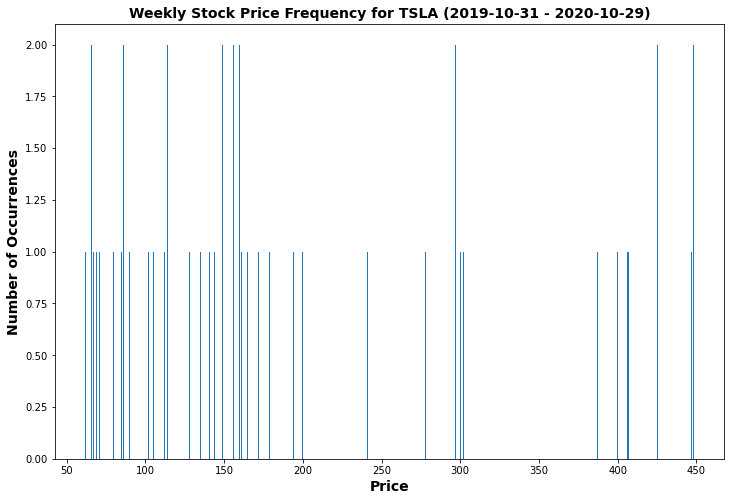

In [50]:
# plot the frequency of prices as a bar chart
fig = plt.figure(figsize=(12,8))
plt.xlabel('Price', fontsize=14, fontweight='bold')
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.title(f'Weekly Stock Price Frequency for TSLA ({min_date} - {max_date})', fontsize=14, fontweight='bold')
bar_chart = plt.bar(list(frequency.keys()), frequency.values(), width=0.5)

In [33]:
# convert frequency dictionary keys into list
frequency_bins = list(frequency.keys())
print(frequency_bins)

[62, 66, 67, 69, 70, 71, 80, 85, 86, 90, 96, 102, 105, 112, 114, 128, 135, 141, 144, 149, 156, 160, 161, 165, 172, 179, 194, 197, 200, 241, 278, 297, 300, 302, 324, 371, 387, 400, 406, 407, 423, 425, 447, 448]


In [34]:
# length of frequency key list
num_bins = len(frequency_bins)
print(num_bins)

44


In [35]:
hist, bin_edges = np.histogram(integer_price_list, bins = num_bins)

In [36]:
hist

array([6, 1, 4, 2, 2, 3, 0, 1, 1, 4, 2, 4, 1, 1, 0, 3, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 3, 0, 3],
      dtype=int64)

In [37]:
bin_edges

array([ 62.        ,  70.77272727,  79.54545455,  88.31818182,
        97.09090909, 105.86363636, 114.63636364, 123.40909091,
       132.18181818, 140.95454545, 149.72727273, 158.5       ,
       167.27272727, 176.04545455, 184.81818182, 193.59090909,
       202.36363636, 211.13636364, 219.90909091, 228.68181818,
       237.45454545, 246.22727273, 255.        , 263.77272727,
       272.54545455, 281.31818182, 290.09090909, 298.86363636,
       307.63636364, 316.40909091, 325.18181818, 333.95454545,
       342.72727273, 351.5       , 360.27272727, 369.04545455,
       377.81818182, 386.59090909, 395.36363636, 404.13636364,
       412.90909091, 421.68181818, 430.45454545, 439.22727273,
       448.        ])

In [38]:
hist.size, bin_edges.size

(44, 45)

In [39]:
first_edge, last_edge = min(frequency_bins), max(frequency_bins)

# matplotlib Histogram

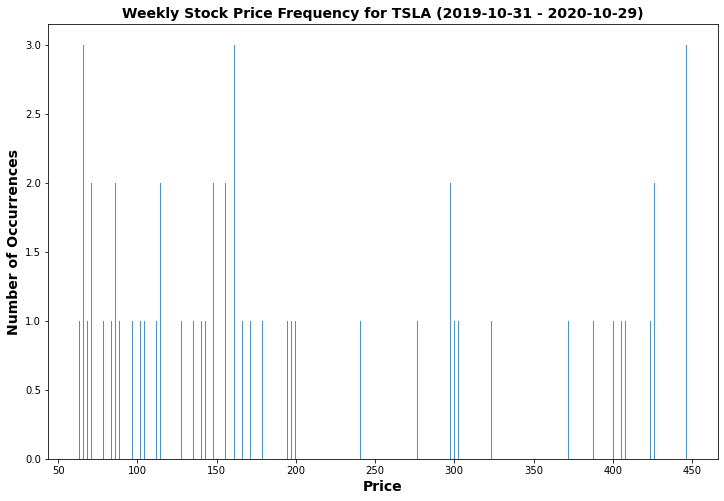

In [48]:
# plot the frequency of prices as a histogram using matplotlib
fig = plt.figure(figsize=(12,8))
plt.xlabel('Price', fontsize=14, fontweight='bold')
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.title(f'Weekly Stock Price Frequency for TSLA ({min_date} - {max_date})', fontsize=14, fontweight='bold')
n, bins, patches = plt.hist(x=integer_price_list, bins=150, alpha=0.8, rwidth=0.25)

# seaborn Histogram

In [ ]:
# plot the frequency of prices as a histogram using seaborn
fig = plt.figure(figsize=(12,8))
plt.xlabel('Price', fontsize=14, fontweight='bold')
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.title(f'Weekly Stock Price Frequency for TSLA ({min_date} - {max_date})', fontsize=14, fontweight='bold')
sns_plot = sns.distplot(integer_price_list, kde=False, bins=150, hist=True)

# Advantages and Disadvantages

- plt.bar from matplotlib effectively plots the price as a function of frequency after cleaning the dataset.

- plt.hist from matplotlib plots the data through the use of equally sized bins. The bin sizes and edges can be customized along with many other parameters. This approach is best for large datasets and fine tuning of plots. The disadvantage is a lot of time consumed during the fine-tuning process and I found it challenging to plot the price vs. frequency because of the equal size bins constraint.

- sns.distplot from seaborn is advantageous when combining a histogram and KDE (Kernel Density Estimation) plot together because the KDE is built in as a function boolean parameter. Again, I found it challenging to plot the price as a function of freqency because of the equal size bins constraint.

